In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import time

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1024 non-null   float64
 3   trestbps  1025 non-null   int64  
 4   chol      1022 non-null   float64
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1023 non-null   float64
 8   exang     1025 non-null   int64  
 9   oldpeak   1023 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1024 non-null   float64
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 112.2 KB


In [8]:
def randomly_replace_values(df, replace_fraction=0.2):
    """
    Randomly replace a fraction of values in each column with NaN.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        replace_fraction (float): Fraction of values to replace with NaN in each column.

    Returns:
        pd.DataFrame: DataFrame with random values replaced by NaN.
    """
    # Iterate over each column
    for col in df.columns:
        # Determine how many values to replace with NaN
        num_to_replace = int(replace_fraction * len(df))

        # Randomly select indices to replace in the current column
        indices = np.random.choice(df.index, num_to_replace, replace=False)
        
        # Set the selected indices to NaN
        df.loc[indices, col] = np.nan
    
    return df

# Apply the function
df_with_random_nans = randomly_replace_values(df, replace_fraction=0.3)
print(df_with_random_nans)

       age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     52.0  1.0  0.0     125.0  212.0  0.0      1.0    168.0    0.0      1.0   
1     53.0  1.0  0.0     140.0  203.0  1.0      0.0    155.0    1.0      NaN   
2      NaN  NaN  NaN       NaN    NaN  0.0      1.0    125.0    1.0      2.6   
3     61.0  1.0  0.0       NaN  203.0  NaN      NaN    161.0    NaN      0.0   
4      NaN  0.0  0.0     138.0    NaN  1.0      1.0    106.0    0.0      1.9   
...    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
1020  59.0  1.0  1.0     140.0  221.0  0.0      NaN    164.0    1.0      0.0   
1021  60.0  1.0  0.0       NaN  258.0  0.0      0.0    141.0    1.0      2.8   
1022  47.0  NaN  NaN       NaN    NaN  NaN      0.0    118.0    1.0      1.0   
1023  50.0  NaN  0.0       NaN  254.0  0.0      NaN    159.0    0.0      NaN   
1024   NaN  1.0  0.0       NaN  188.0  0.0      1.0    113.0    0.0      1.4   

      slope   ca  thal  target  
0     

In [10]:
df=df.fillna('')

In [12]:
print(df)

       age  sex   cp trestbps   chol  fbs restecg thalach exang oldpeak slope  \
0     52.0  1.0  0.0    125.0  212.0  0.0     1.0   168.0   0.0     1.0   2.0   
1     53.0  1.0  0.0    140.0  203.0  1.0     0.0   155.0   1.0           0.0   
2                                     0.0     1.0   125.0   1.0     2.6   0.0   
3     61.0  1.0  0.0           203.0                161.0           0.0         
4           0.0  0.0    138.0         1.0     1.0   106.0   0.0     1.9   1.0   
...    ...  ...  ...      ...    ...  ...     ...     ...   ...     ...   ...   
1020  59.0  1.0  1.0    140.0  221.0  0.0           164.0   1.0     0.0   2.0   
1021  60.0  1.0  0.0           258.0  0.0     0.0   141.0   1.0     2.8   1.0   
1022  47.0                                    0.0   118.0   1.0     1.0   1.0   
1023  50.0       0.0           254.0  0.0           159.0   0.0                 
1024        1.0  0.0           188.0  0.0     1.0   113.0   0.0     1.4   1.0   

       ca thal target  
0  

In [14]:
import pandas as pd

# Assuming df is your DataFrame

# Get standard deviation values for numeric columns only
std_values = df.std(numeric_only=True)
print("Standard deviation values for numeric columns:\n", std_values)

# Convert non-numeric columns to NaN (if needed)
df = df.apply(pd.to_numeric, errors='coerce')

# Calculate the standard deviation values for each column
std_values = df.std()

# Fill NaN values in each column with its standard deviation
df_filled_with_std = df.fillna(std_values)

# Display the original and new DataFrame
print("Original DataFrame:\n", df)
print("New DataFrame with NaN filled by column standard deviation:\n", df_filled_with_std)

# Save the new DataFrame to a CSV file
df_filled_with_std.to_csv('new_data_std.csv', index=False)


Standard deviation values for numeric columns:
 Series([], dtype: float64)
Original DataFrame:
        age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     52.0  1.0  0.0     125.0  212.0  0.0      1.0    168.0    0.0      1.0   
1     53.0  1.0  0.0     140.0  203.0  1.0      0.0    155.0    1.0      NaN   
2      NaN  NaN  NaN       NaN    NaN  0.0      1.0    125.0    1.0      2.6   
3     61.0  1.0  0.0       NaN  203.0  NaN      NaN    161.0    NaN      0.0   
4      NaN  0.0  0.0     138.0    NaN  1.0      1.0    106.0    0.0      1.9   
...    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
1020  59.0  1.0  1.0     140.0  221.0  0.0      NaN    164.0    1.0      0.0   
1021  60.0  1.0  0.0       NaN  258.0  0.0      0.0    141.0    1.0      2.8   
1022  47.0  NaN  NaN       NaN    NaN  NaN      0.0    118.0    1.0      1.0   
1023  50.0  NaN  0.0       NaN  254.0  0.0      NaN    159.0    0.0      NaN   
1024   NaN  1.0  0.0    

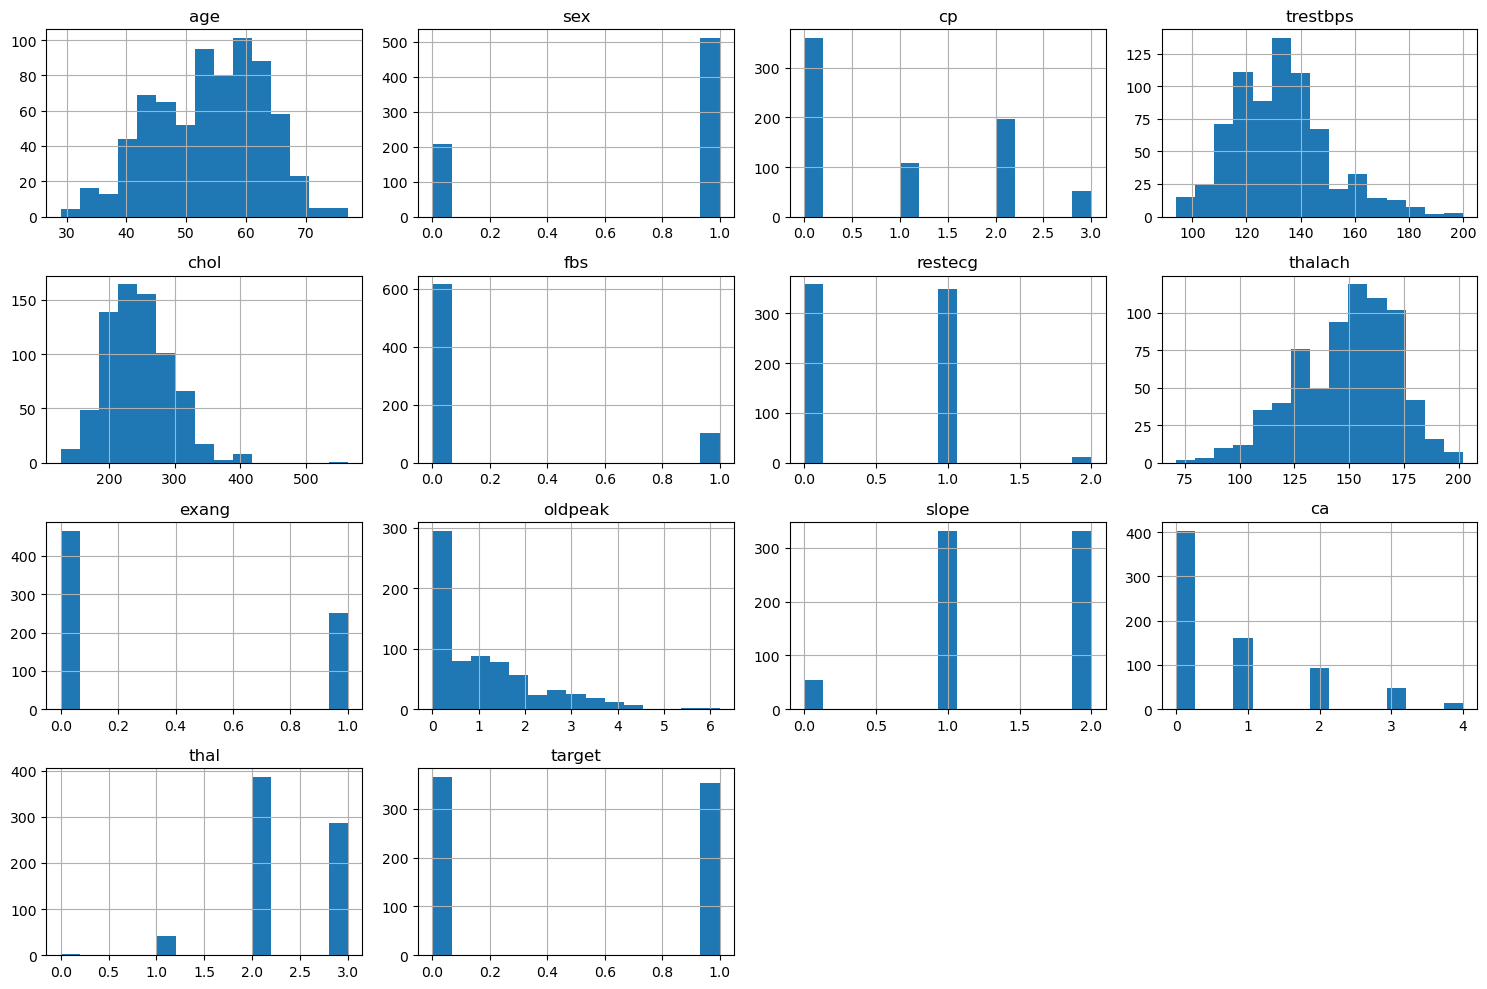

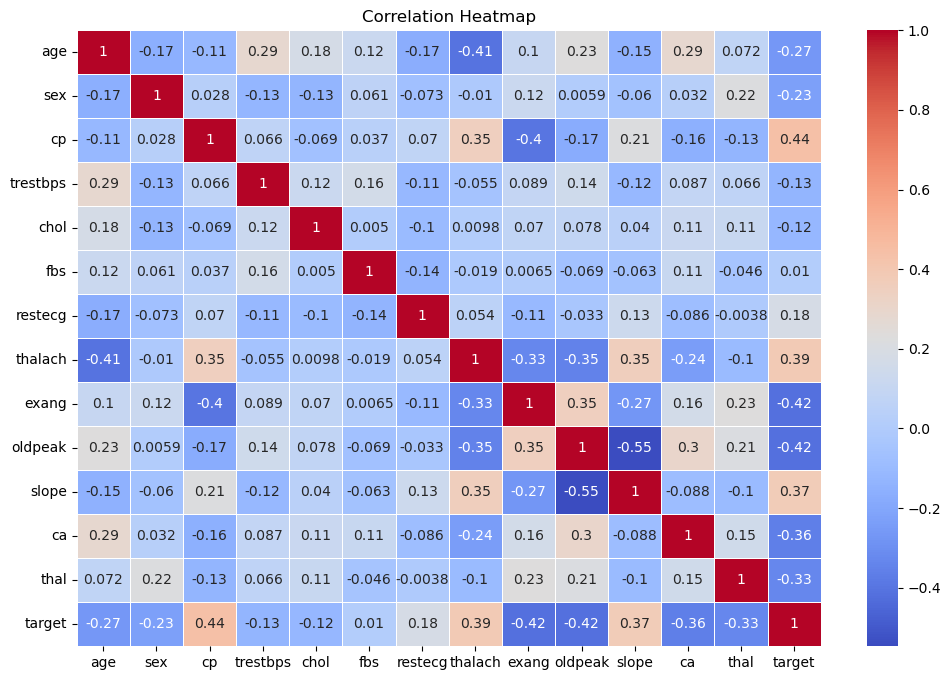

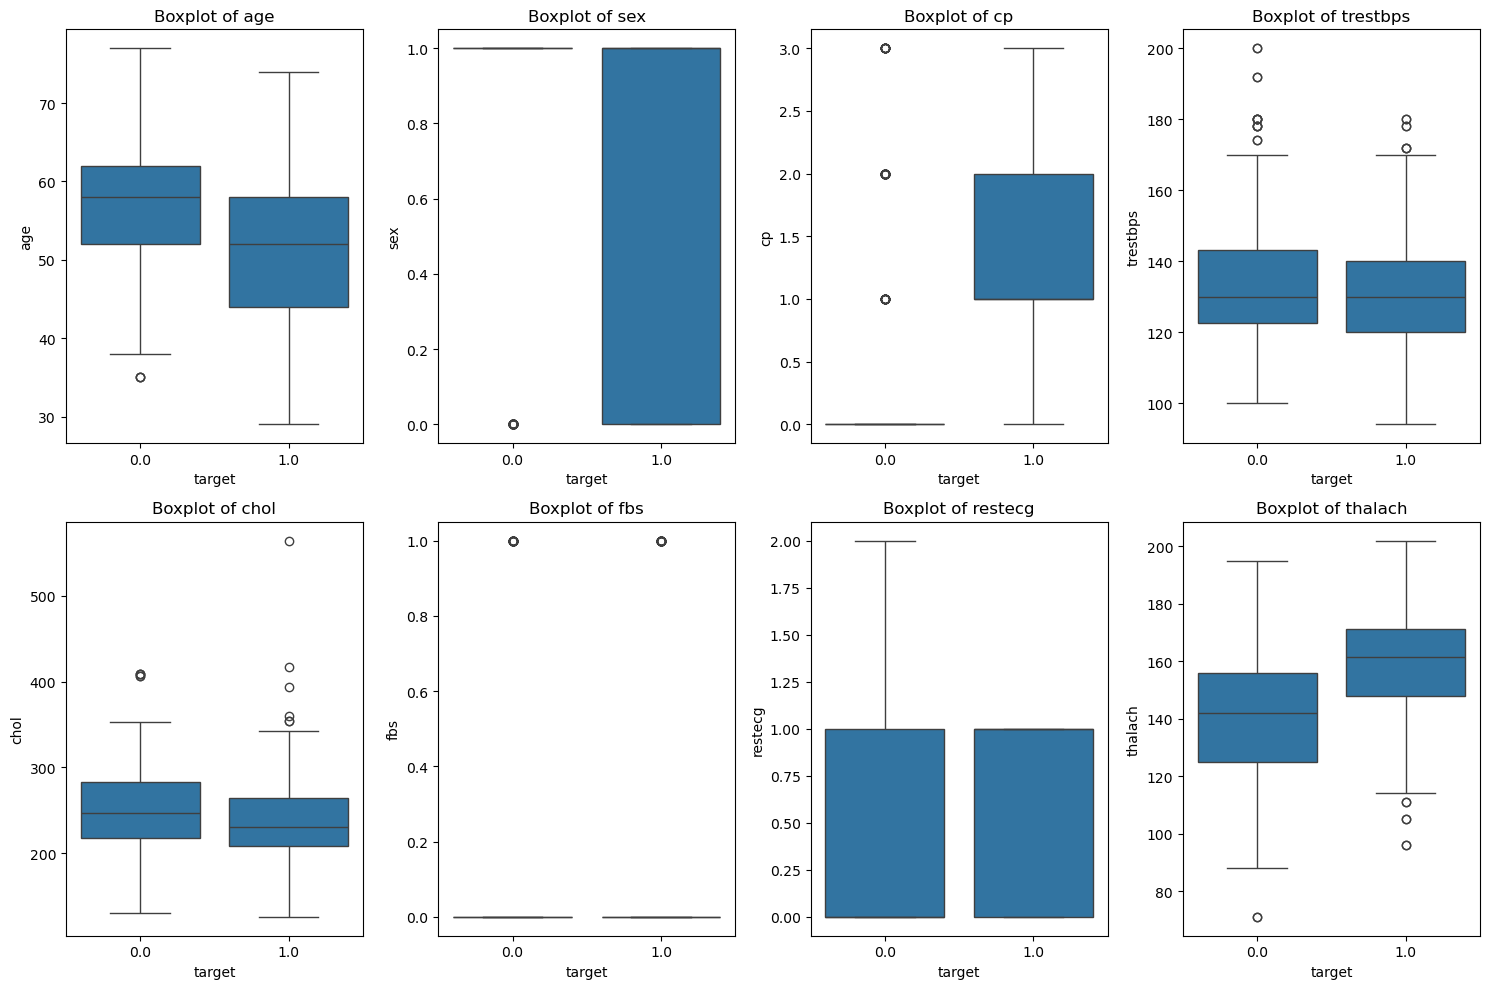

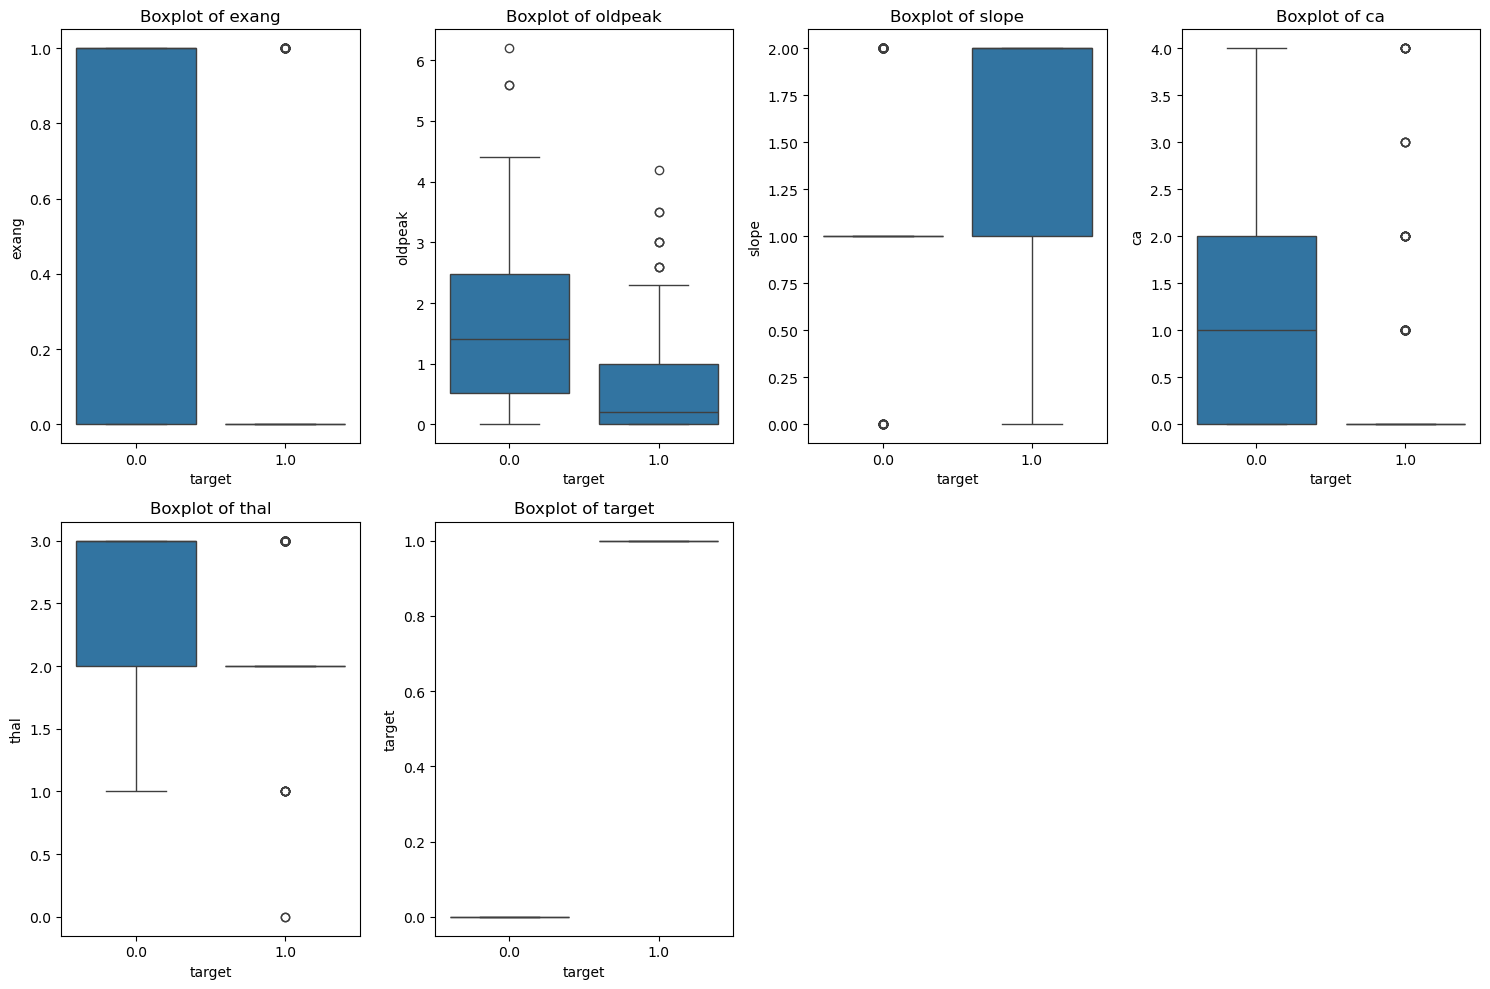

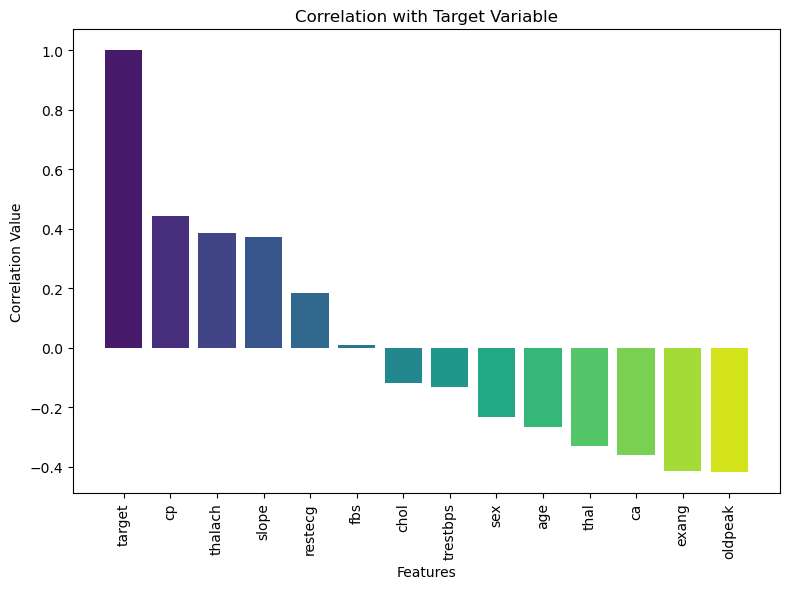

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histograms for Numeric Features
def plot_histograms(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    df[numeric_columns].hist(bins=15, figsize=(15, 10), layout=(4, 4))
    plt.tight_layout()
    plt.show()


# 3. Correlation Heatmap
def plot_correlation_heatmap(df):
    corr = df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

# 4. Boxplots to Check for Outliers
def plot_boxplots(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    chunk_size = 8  # Number of plots per figure
    for start in range(0, len(numeric_columns), chunk_size):
        plt.figure(figsize=(15, 10))
        for i, col in enumerate(numeric_columns[start:start + chunk_size]):
            plt.subplot(2, 4, i + 1)
            sns.boxplot(x='target', y=col, data=df)
            plt.title(f"Boxplot of {col}")
        plt.tight_layout()
        plt.show()

# 5. Countplot for Categorical Features
def plot_countplots(df):
    categorical_columns = df.select_dtypes(include=['object', 'int64']).columns
    for col in categorical_columns:
        if df[col].nunique() <= 10:  # Limit to fewer unique categories
            plt.figure(figsize=(6, 4))
            sns.countplot(x=col, hue='target', data=df, palette='coolwarm')
            plt.title(f"Countplot of {col}")
            plt.show()


import numpy as np

# 6. Correlation Between Features with Target
def plot_target_correlation(df):
    correlation_with_target = df.corr()['target'].sort_values(ascending=False)
    plt.figure(figsize=(8, 6))
    
    # Generate a custom color palette
    colors = sns.color_palette('viridis', n_colors=len(correlation_with_target))
    
    # Create a barplot with explicit color assignment
    bars = plt.bar(correlation_with_target.index, correlation_with_target.values, color=colors)
    
    # Add labels and style
    plt.title('Correlation with Target Variable')
    plt.xticks(rotation=90)
    plt.ylabel('Correlation Value')
    plt.xlabel('Features')
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming `df` is your preprocessed DataFrame

# Run all the visualizations
plot_histograms(df)

plot_correlation_heatmap(df)
plot_boxplots(df)
plot_countplots(df)
plot_target_correlation(df)


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming df_filled_with_std is already defined as your DataFrame with missing values replaced by standard deviation

# Split the data into independent (X) and dependent (y) variables
X = df_filled_with_std.iloc[:, :-1]  # Independent variables (all columns except the last)
y = df_filled_with_std.iloc[:, -1]   # Dependent variable (the last column)


# Round the target variable to 1 decimal place
y = y.round(1)  # Map values like 0.500317 to 0.5

# Convert to integer type (discrete classes)
y = y.astype(int)

# Now treat it as categorical data for classification tasks
y = pd.Categorical(y)

# Split the data into training and testing sets (30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature set using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=2000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 71.75%


In [19]:
y_pred.shape

(308,)

In [21]:
from sklearn.ensemble import IsolationForest  # For One-Class Classification
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Naïve Bayes Classifier": GaussianNB(),
    "One-Class Classification": IsolationForest(contamination=0.1),
    "K Nearest Neighbour Classifier": KNeighborsClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Neural Network Based Classifier": MLPClassifier(max_iter=1000)
}

In [23]:
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [25]:
from time import time  # Import the time module
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")


results = []

# Train and evaluate each model using K-fold cross-validation
for name, model in models.items():
    start_time = time()  # Start the timer using time.time()
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)
    end_time = time()  # End the timer using time.time()

    # Compute the average of each metric across the folds
    accuracy = np.mean(scores['test_accuracy'])
    precision = np.mean(scores['test_precision'])
    recall = np.mean(scores['test_recall'])
    f1 = np.mean(scores['test_f1'])
    auc = np.mean(scores['test_roc_auc'])
    elapsed_time = end_time - start_time  # Time taken to run the model

    # Store the results in the list
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'AUC': auc,
        'Time (s)': elapsed_time
    })

    print(f"{name} completed in {elapsed_time:4f} seconds.")


Logistic Regression completed in 0.148327 seconds.
Support Vector Machine completed in 0.525548 seconds.
Decision Tree Classifier completed in 0.081353 seconds.
Naïve Bayes Classifier completed in 0.061515 seconds.
One-Class Classification completed in 1.566240 seconds.
K Nearest Neighbour Classifier completed in 0.185213 seconds.
Random Forest Classifier completed in 1.766866 seconds.
Neural Network Based Classifier completed in 19.416743 seconds.


In [27]:
results_df = pd.DataFrame(results)

In [29]:
results_df

,Model,Accuracy,Precision,Recall,F1-score,AUC,Time (s)
0,Logistic Regression,0.711247,0.626031,0.539623,0.578589,0.776083,0.148327
1,Support Vector Machine,0.694483,0.590186,0.554717,0.569045,0.768625,0.525548
2,Decision Tree Classifier,0.656925,0.534223,0.562264,0.544779,0.637445,0.081353
3,Naïve Bayes Classifier,0.708518,0.594836,0.667925,0.628740,0.772924,0.061515
4,One-Class Classification,0.329089,NaN,NaN,NaN,0.527971,1.566240
5,K Nearest Neighbour Classifier,0.669396,0.552769,0.535849,0.542202,0.719137,0.185213
6,Random Forest Classifier,0.747475,0.677500,0.596226,0.629937,0.805619,1.766866
7,Neural Network Based Classifier,0.662451,0.544658,0.539623,0.539990,0.737766,19.416743


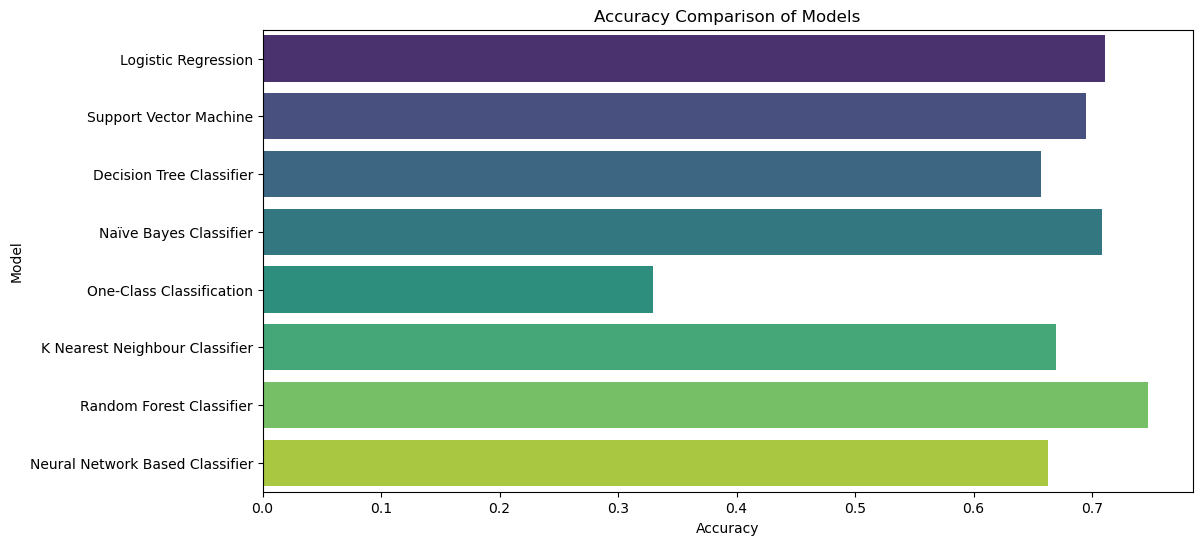

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Accuracy Comparison of Models")
plt.show()

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

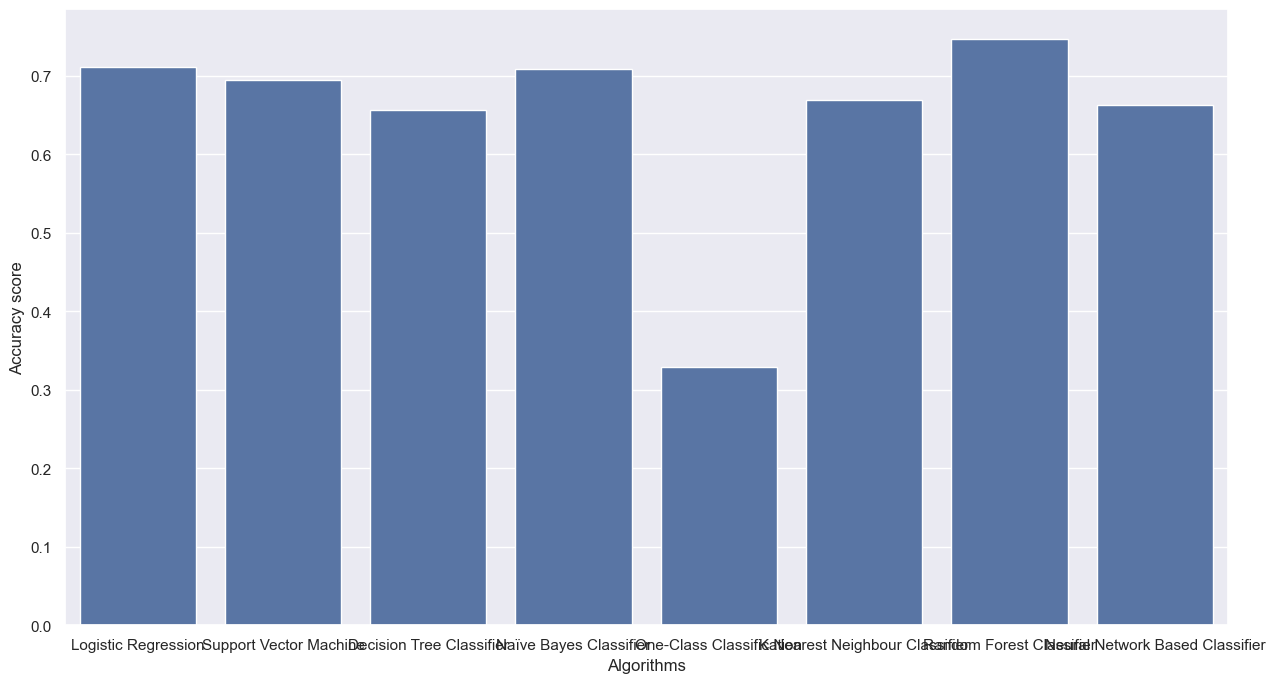

In [33]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=results_df['Model'], y=results_df['Accuracy'])

In [35]:
results_df.to_csv("model_comparison_stddev.csv", index=False)